<a href="https://colab.research.google.com/github/13mayankjoshi13/Data_Analysis_of_IPL_2024/blob/main/Project_IPL_2024_Player_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

We have compiled performance data for all players who participated in the IPL 2024 season.

This dataset includes key statistics such as matches played, runs, wickets, batting and bowling averages, strike rate, catches, runouts, and stumpings.

Using these data points, our goal is to construct the best playing XI from the current IPL campaign using a combination of Data Science, Machine Learning (ML), and Deep Learning (DL) concepts.

# **Approach:**

**1️⃣ Data Extraction & Loading**

Gather and import the dataset.

**2️⃣ Data Cleaning & Preprocessing**

Handle missing values and ensure data accuracy.

3️⃣ **Performance Analysis Using Data Science**

Analyze key statistics to identify top-performing players.

Use statistical methods and visualization to compare performances.

4️⃣  **Best XI Selection Using AI & Deep Learning**

We leverage Deep Learning models, such as Artificial Neural Networks (ANNs), for performance prediction and player ranking.

=>**Predictive Modeling Using Machine Learning**

Train ML models to predict player performance trends based on historical and current data.

Factor in consistency, match impact, and key performance indicators.

The model learns hidden patterns in player stats to enhance selection accuracy.
The final team selection is data-driven, ensuring an optimized balance of batters, bowlers, all-rounders, and wicketkeepers.

Inspired by ICC World Cup-winning squads and past IPL-winning team formations to create a competitive lineup.

By integrating Data Science, Machine Learning, and Deep Learning, this approach ensures a more accurate and unbiased selection process, aiding in team formation, strategy planning, and player scouting.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Data**

To import the dataset ,we will use the pandas package from the python  programming language.The other packages like matplotlib, seaborn and numpy will be useful for computations and creating visual represtantions.

In [ ]:
data_set = pd.read_csv("https://raw.githubusercontent.com/13mayankjoshi13/Data_Analysis_of_IPL_2024/refs/heads/main/IPL_2024_Players_Dataset.csv")
data_set.head() #returns the first 5 rows of the dataset

# 1️⃣**Purpose of describe()**

The describe() function in pandas generates summary statistics for numerical columns in a dataset. It provides a quick overview of the distribution, central tendency, and spread of the data.

2️⃣**What Does It Show?**

When you run data_set.describe(), it returns:

**Count**– Number of non-null values in each column.

**Mean** – Average value of each numerical column.

**Standard** Deviation (std) – Measure of how spread out the data is.

**Min & Max**– Minimum and maximum values.

**25th, 50th (Median), and 75th Percentiles** – Useful for understanding data distribution.

**3️⃣ Why Is It Important for Our IPL Analysis?**

Helps understand the dataset’s structure before applying ML models.
Identifies outliers and inconsistencies in player statistics.
Provides insights into average runs, wickets, strike rates, etc., which help in selecting the best players.

We use data_set.describe() to get a quick statistical summary of the dataset, making it easier to clean, analyze, and build models based on player performance.

This helps us determine which players are above average and how different stats are distributed.

In [ ]:
data_set.describe()  #returns the information like count, mean, std, min etc which are used in alaysis

To check and count the number of missing (NaN) values in each column of your IPL 2024 dataset, helping you identify and handle missing data.

The code replaces any instances of "No", 0, or 0.00 in the data_set with NaN, making it easier to handle missing or irrelevant data during further analysis.

In [ ]:
# Replace "No" with NaN ( so that we can consider it in noise )
data_set.replace(["No", 0, 0.00], np.nan, inplace=True)

# Save the modified dataset
data_set.to_csv("modified_file.csv", index=False)
data_set.isna().sum()

A summary of the dataset, showing the number of entries, columns, non-null values in each column, and the data types, helping you understand its structure.

In [ ]:
print(data_set.info()) #gives informtion about the dataset column and data type

# **Cleaning The Data / Handling Nan Values**

We will filter out the capped batsmen from the IPL dataset and extract their key performance statistics. This will help us analyze the top-performing capped batsmen based on metrics like runs, average, and strike rate for further decision-making or team selection.

In [ ]:
batsmen = data_set.loc[(data_set["Player Type"] == "Batsman")]
batsmen_new = batsmen.loc[(batsmen["Capped"] == "Yes")]
Capped_Batsmen = batsmen_new[['Player Name',
                            'Team',
                            'Nationality',
                            'Matches Played',
                            'Runs',
                            'Average',
                            'Strike Rate']]
Capped_Batsmen.head()

Now the same goes for the bowlers too ,we will filter out the capped bowlers from the IPL dataset and extract their key performance statistics. This will allow us to analyze the top-performing capped bowlers based on metrics like wickets, bowling average, economy rate, and bowling strike rate for further decision-making or team selection.

In [ ]:
bowlers = data_set.loc[(data_set["Player Type"] == "Bowler")]
bowlers_new = bowlers.loc[(bowlers["Capped"] == "Yes")]
Capped_Bowlers = bowlers_new[['Player Name',
                            'Team',
                            'Nationality',
                            'Matches Played',
                            'Wickets',
                            'Bowling Average',
                            'Economy',
                            'Bowling Strike Rate']]
Capped_Bowlers.head()

Now for the wicket keepers , we will filter out the capped wicket-keepers from the IPL dataset and extract their key performance statistics. This will help us analyze the top-performing capped wicket-keepers based on metrics like runs, average, strike rate, catches, run outs, and stumps for further decision-making or team selection.

In [ ]:
Keepers = data_set.loc[(data_set["Player Type"] == "Wicket-Keeper")]
Keepers_new = Keepers.loc[(Keepers["Capped"] == "Yes")]
Capped_Keepers = Keepers_new[['Player Name',
                            'Team',
                            'Nationality',
                            'Matches Played',
                            'Runs',
                            'Average',
                            'Strike Rate',
                            'Catches',
                            'Run Outs',
                            'Stumps']]
Capped_Keepers.head()

For the last player type i.e. all rounder , we will filter out the capped all-rounders from the IPL dataset and extract their key performance statistics. This will allow us to analyze the top-performing capped all-rounders based on metrics like runs, average, strike rate, wickets, bowling average, economy rate, and bowling strike rate for further decision-making or team selection

In [ ]:
all_rounders = data_set.loc[(data_set["Player Type"] == "All-Rounder")]
all_rounders_new = all_rounders.loc[(all_rounders["Capped"] == "Yes")]
Capped_all_rounders = all_rounders_new[['Player Name',
                                      'Team',
                                      'Nationality',
                                      'Matches Played',
                                      'Runs',
                                      'Average',
                                      'Strike Rate',
                                      'Wickets',
                                      'Bowling Average',
                                      'Economy',
                                      'Bowling Strike Rate']]
Capped_all_rounders.head()

Now, after handling the NaN values, let's check for any null data in the dataset to ensure we have complete information for analysis.

In [ ]:
print(Capped_Batsmen.isna().sum())
print(Capped_Bowlers.isna().sum())
print(Capped_Keepers.isna().sum())
print(Capped_all_rounders.isna().sum())

# **Initial Analysis**

In this analysis, we will focus on capped batsmen, bowlers, wicket-keepers, and all-rounders, sorting them based on key performance metrics. For batsmen, we will consider batting average, strike rate, total runs, and matches played. For bowlers, we will analyze wickets, bowling average, economy rate, and bowling strike rate. Wicket-keepers will be evaluated based on runs, average, strike rate, catches, run outs, and stumps. All-rounders will be assessed for both batting and bowling performance, including runs, average, strike rate, wickets, bowling average, economy rate, and bowling strike rate.

In [ ]:
#Analyzing the Batsman Data
#Here we have narrowed our analysis to batters who have a batting average more than 20.0
top_batsmen = Capped_Batsmen. loc [(Capped_Batsmen["Average"] >= 20.0)]
#Sorting the data in descending order with respect to each parameter
top_batsmen_average = top_batsmen.sort_values('Average', ascending=False)
top_batsmen_strike_rate = top_batsmen.sort_values('Strike Rate', ascending=False)
top_batsmen_runs = top_batsmen.sort_values('Runs', ascending=False)
top_batsmen_matches = top_batsmen.sort_values('Matches Played', ascending=False)

In [ ]:
top_batsmen_average

In [ ]:
top_batsmen_strike_rate

In [ ]:
top_batsmen_runs

In [ ]:
top_batsmen_matches

# **Top 5 Batsmen Based on Data Analysis of IPL 2024**

Based on our data analysis, the top 5 batsmen are :-  

1: Rohit Sharma  
2: David Warner  
3: Nitish Rana  
4: Washington Sundar  
5: Lungi Ngidi

In [ ]:
#Analyzing the Bowlers Data
#Here we have narrowed our analysis to bowlers who have a bowling average less than 20.0
top_bowlers = Capped_Bowlers.loc [(Capped_Bowlers["Bowling Average"] <= 20.0)]
#Sorting the data in descending order with respect to each parameter
top_bowlers_average = top_bowlers.sort_values('Bowling Average')
top_bowlers_strike_rate = top_bowlers.sort_values('Bowling Strike Rate')
top_bowlers_wickets = top_bowlers.sort_values('Wickets', ascending=False)
top_bowlers_economy = top_bowlers.sort_values('Economy')
top_bowlers_matches = top_bowlers.sort_values('Matches Played', ascending=False)

In [ ]:
top_bowlers_average

In [ ]:
top_bowlers_strike_rate

In [ ]:
top_bowlers_wickets

In [ ]:
top_bowlers_economy

In [ ]:
top_bowlers_matches

# **Top Bowlers Based on Data Analysis of IPL 2024**

Based on our data analysis, the top bowlers are :-  
1: Iftikhar Ahmed	         
2: Faf du Plessis        
3: Yuzvendra Chahal       
4: Shaheen Afridi

In [ ]:
#Analyzing the Allrounder Data
#We have narrowed our analysis by further segregating the allrounders based on strike rate equal to or more than 140.0.
top_allrounders = Capped_all_rounders.loc[(Capped_all_rounders["Strike Rate"] >= 140.0)]
top_allrounders_average = top_allrounders.sort_values('Average', ascending=False)
top_alrounders_strike_rate = top_allrounders.sort_values('Strike Rate', ascending=False)
top_allrounders_runs = top_allrounders.sort_values('Runs', ascending=False)
top_allrounders_matches = top_allrounders.sort_values('Matches Played', ascending=False)
top_allrounders_bowling_average = top_allrounders.sort_values('Bowling Average')
top_allrounders_bowling_strike_rate = top_allrounders.sort_values('Bowling Strike Rate')
top_allrounders_wickets = top_allrounders.sort_values('Wickets', ascending=False)
top_allrounders_economy = top_allrounders.sort_values('Economy')

In [106]:
top_allrounders

,Player Name,Team,Nationality,Player Type,Capped,Matches Played,Runs,Average,Strike Rate,Wickets,Bowling Average,Economy,Bowling Strike Rate,Catches,Run Outs,Stumps
58,Dawid Malan,Lucknow Super Giants,English,All-Rounder,Yes,46,2138,49.63,130.10,243,33.74,4.42,57.61,16,12,0
120,Pathum Nissanka,Kolkata Knight Riders,Sri Lankan,All-Rounder,No,12,2555,55.27,159.82,240,17.59,9.98,10.45,2,10,0
73,Daryl Mitchell,Punjab Kings,New Zealander,All-Rounder,Yes,18,3261,53.46,90.10,234,30.18,4.97,52.90,29,2,0


In [107]:
top_allrounders_average

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Wickets,Bowling Average,Economy,Bowling Strike Rate
8,Devon Conway,Punjab Kings,New Zealander,26.0,1185.0,57.09,193.54,9.0,46.28,6.14,42.52
3,Odean Smith,Lucknow Super Giants,West Indian,59.0,1338.0,56.89,140.37,NaN,NaN,NaN,NaN
5,Najmul Hossain,Sunrisers Hyderabad,Bangladeshi,82.0,2943.0,54.82,141.73,88.0,17.97,5.64,52.63
91,Shakib Al Hasan,Delhi Capitals,Bangladeshi,25.0,3226.0,48.38,164.58,NaN,NaN,NaN,NaN
86,Marcus Stoinis,Punjab Kings,Australian,54.0,2483.0,43.65,159.14,NaN,NaN,NaN,NaN
78,Glenn Maxwell,Kolkata Knight Riders,South African,85.0,210.0,24.55,199.46,73.0,39.29,7.28,15.16
38,Liam Livingstone,Delhi Capitals,English,NaN,1187.0,21.81,151.39,NaN,NaN,NaN,NaN
81,Hasan Ali,Lucknow Super Giants,Pakistani,11.0,3548.0,14.99,174.09,133.0,14.08,6.74,31.61
79,Bhanuka Rajapaksa,Royal Challengers Bangalore,Sri Lankan,16.0,973.0,10.86,141.53,178.0,47.12,8.94,29.78


In [108]:
top_alrounders_strike_rate

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Wickets,Bowling Average,Economy,Bowling Strike Rate
78,Glenn Maxwell,Kolkata Knight Riders,South African,85.0,210.0,24.55,199.46,73.0,39.29,7.28,15.16
8,Devon Conway,Punjab Kings,New Zealander,26.0,1185.0,57.09,193.54,9.0,46.28,6.14,42.52
81,Hasan Ali,Lucknow Super Giants,Pakistani,11.0,3548.0,14.99,174.09,133.0,14.08,6.74,31.61
91,Shakib Al Hasan,Delhi Capitals,Bangladeshi,25.0,3226.0,48.38,164.58,NaN,NaN,NaN,NaN
86,Marcus Stoinis,Punjab Kings,Australian,54.0,2483.0,43.65,159.14,NaN,NaN,NaN,NaN
38,Liam Livingstone,Delhi Capitals,English,NaN,1187.0,21.81,151.39,NaN,NaN,NaN,NaN
5,Najmul Hossain,Sunrisers Hyderabad,Bangladeshi,82.0,2943.0,54.82,141.73,88.0,17.97,5.64,52.63
79,Bhanuka Rajapaksa,Royal Challengers Bangalore,Sri Lankan,16.0,973.0,10.86,141.53,178.0,47.12,8.94,29.78
3,Odean Smith,Lucknow Super Giants,West Indian,59.0,1338.0,56.89,140.37,NaN,NaN,NaN,NaN


In [109]:
top_allrounders_runs

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Wickets,Bowling Average,Economy,Bowling Strike Rate
81,Hasan Ali,Lucknow Super Giants,Pakistani,11.0,3548.0,14.99,174.09,133.0,14.08,6.74,31.61
91,Shakib Al Hasan,Delhi Capitals,Bangladeshi,25.0,3226.0,48.38,164.58,NaN,NaN,NaN,NaN
5,Najmul Hossain,Sunrisers Hyderabad,Bangladeshi,82.0,2943.0,54.82,141.73,88.0,17.97,5.64,52.63
86,Marcus Stoinis,Punjab Kings,Australian,54.0,2483.0,43.65,159.14,NaN,NaN,NaN,NaN
3,Odean Smith,Lucknow Super Giants,West Indian,59.0,1338.0,56.89,140.37,NaN,NaN,NaN,NaN
38,Liam Livingstone,Delhi Capitals,English,NaN,1187.0,21.81,151.39,NaN,NaN,NaN,NaN
8,Devon Conway,Punjab Kings,New Zealander,26.0,1185.0,57.09,193.54,9.0,46.28,6.14,42.52
79,Bhanuka Rajapaksa,Royal Challengers Bangalore,Sri Lankan,16.0,973.0,10.86,141.53,178.0,47.12,8.94,29.78
78,Glenn Maxwell,Kolkata Knight Riders,South African,85.0,210.0,24.55,199.46,73.0,39.29,7.28,15.16


In [110]:
top_allrounders_matches

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Wickets,Bowling Average,Economy,Bowling Strike Rate
78,Glenn Maxwell,Kolkata Knight Riders,South African,85.0,210.0,24.55,199.46,73.0,39.29,7.28,15.16
5,Najmul Hossain,Sunrisers Hyderabad,Bangladeshi,82.0,2943.0,54.82,141.73,88.0,17.97,5.64,52.63
3,Odean Smith,Lucknow Super Giants,West Indian,59.0,1338.0,56.89,140.37,NaN,NaN,NaN,NaN
86,Marcus Stoinis,Punjab Kings,Australian,54.0,2483.0,43.65,159.14,NaN,NaN,NaN,NaN
8,Devon Conway,Punjab Kings,New Zealander,26.0,1185.0,57.09,193.54,9.0,46.28,6.14,42.52
91,Shakib Al Hasan,Delhi Capitals,Bangladeshi,25.0,3226.0,48.38,164.58,NaN,NaN,NaN,NaN
79,Bhanuka Rajapaksa,Royal Challengers Bangalore,Sri Lankan,16.0,973.0,10.86,141.53,178.0,47.12,8.94,29.78
81,Hasan Ali,Lucknow Super Giants,Pakistani,11.0,3548.0,14.99,174.09,133.0,14.08,6.74,31.61
38,Liam Livingstone,Delhi Capitals,English,NaN,1187.0,21.81,151.39,NaN,NaN,NaN,NaN


In [111]:
top_allrounders_bowling_average

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Wickets,Bowling Average,Economy,Bowling Strike Rate
81,Hasan Ali,Lucknow Super Giants,Pakistani,11.0,3548.0,14.99,174.09,133.0,14.08,6.74,31.61
5,Najmul Hossain,Sunrisers Hyderabad,Bangladeshi,82.0,2943.0,54.82,141.73,88.0,17.97,5.64,52.63
78,Glenn Maxwell,Kolkata Knight Riders,South African,85.0,210.0,24.55,199.46,73.0,39.29,7.28,15.16
8,Devon Conway,Punjab Kings,New Zealander,26.0,1185.0,57.09,193.54,9.0,46.28,6.14,42.52
79,Bhanuka Rajapaksa,Royal Challengers Bangalore,Sri Lankan,16.0,973.0,10.86,141.53,178.0,47.12,8.94,29.78
3,Odean Smith,Lucknow Super Giants,West Indian,59.0,1338.0,56.89,140.37,NaN,NaN,NaN,NaN
38,Liam Livingstone,Delhi Capitals,English,NaN,1187.0,21.81,151.39,NaN,NaN,NaN,NaN
86,Marcus Stoinis,Punjab Kings,Australian,54.0,2483.0,43.65,159.14,NaN,NaN,NaN,NaN
91,Shakib Al Hasan,Delhi Capitals,Bangladeshi,25.0,3226.0,48.38,164.58,NaN,NaN,NaN,NaN


In [112]:
top_allrounders_bowling_strike_rate

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Wickets,Bowling Average,Economy,Bowling Strike Rate
78,Glenn Maxwell,Kolkata Knight Riders,South African,85.0,210.0,24.55,199.46,73.0,39.29,7.28,15.16
79,Bhanuka Rajapaksa,Royal Challengers Bangalore,Sri Lankan,16.0,973.0,10.86,141.53,178.0,47.12,8.94,29.78
81,Hasan Ali,Lucknow Super Giants,Pakistani,11.0,3548.0,14.99,174.09,133.0,14.08,6.74,31.61
8,Devon Conway,Punjab Kings,New Zealander,26.0,1185.0,57.09,193.54,9.0,46.28,6.14,42.52
5,Najmul Hossain,Sunrisers Hyderabad,Bangladeshi,82.0,2943.0,54.82,141.73,88.0,17.97,5.64,52.63
3,Odean Smith,Lucknow Super Giants,West Indian,59.0,1338.0,56.89,140.37,NaN,NaN,NaN,NaN
38,Liam Livingstone,Delhi Capitals,English,NaN,1187.0,21.81,151.39,NaN,NaN,NaN,NaN
86,Marcus Stoinis,Punjab Kings,Australian,54.0,2483.0,43.65,159.14,NaN,NaN,NaN,NaN
91,Shakib Al Hasan,Delhi Capitals,Bangladeshi,25.0,3226.0,48.38,164.58,NaN,NaN,NaN,NaN


In [113]:
top_allrounders_wickets

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Wickets,Bowling Average,Economy,Bowling Strike Rate
79,Bhanuka Rajapaksa,Royal Challengers Bangalore,Sri Lankan,16.0,973.0,10.86,141.53,178.0,47.12,8.94,29.78
81,Hasan Ali,Lucknow Super Giants,Pakistani,11.0,3548.0,14.99,174.09,133.0,14.08,6.74,31.61
5,Najmul Hossain,Sunrisers Hyderabad,Bangladeshi,82.0,2943.0,54.82,141.73,88.0,17.97,5.64,52.63
78,Glenn Maxwell,Kolkata Knight Riders,South African,85.0,210.0,24.55,199.46,73.0,39.29,7.28,15.16
8,Devon Conway,Punjab Kings,New Zealander,26.0,1185.0,57.09,193.54,9.0,46.28,6.14,42.52
3,Odean Smith,Lucknow Super Giants,West Indian,59.0,1338.0,56.89,140.37,NaN,NaN,NaN,NaN
38,Liam Livingstone,Delhi Capitals,English,NaN,1187.0,21.81,151.39,NaN,NaN,NaN,NaN
86,Marcus Stoinis,Punjab Kings,Australian,54.0,2483.0,43.65,159.14,NaN,NaN,NaN,NaN
91,Shakib Al Hasan,Delhi Capitals,Bangladeshi,25.0,3226.0,48.38,164.58,NaN,NaN,NaN,NaN


In [114]:
top_allrounders_economy

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Wickets,Bowling Average,Economy,Bowling Strike Rate
5,Najmul Hossain,Sunrisers Hyderabad,Bangladeshi,82.0,2943.0,54.82,141.73,88.0,17.97,5.64,52.63
8,Devon Conway,Punjab Kings,New Zealander,26.0,1185.0,57.09,193.54,9.0,46.28,6.14,42.52
81,Hasan Ali,Lucknow Super Giants,Pakistani,11.0,3548.0,14.99,174.09,133.0,14.08,6.74,31.61
78,Glenn Maxwell,Kolkata Knight Riders,South African,85.0,210.0,24.55,199.46,73.0,39.29,7.28,15.16
79,Bhanuka Rajapaksa,Royal Challengers Bangalore,Sri Lankan,16.0,973.0,10.86,141.53,178.0,47.12,8.94,29.78
3,Odean Smith,Lucknow Super Giants,West Indian,59.0,1338.0,56.89,140.37,NaN,NaN,NaN,NaN
38,Liam Livingstone,Delhi Capitals,English,NaN,1187.0,21.81,151.39,NaN,NaN,NaN,NaN
86,Marcus Stoinis,Punjab Kings,Australian,54.0,2483.0,43.65,159.14,NaN,NaN,NaN,NaN
91,Shakib Al Hasan,Delhi Capitals,Bangladeshi,25.0,3226.0,48.38,164.58,NaN,NaN,NaN,NaN


# **Top All Rounders Based on Data Analysis of IPL 2024**

Based on our data analysis, the top all rounders are :-  

1: Najmul Hossain   
2: Hasan Ali   
3: Devon Conway   
4: Glenn Maxwell  
5: Odean Smith  
6: Marcus Stoinis   
7: Shakib Al Hasan   
8: Bhanuka Rajapaksa   




In [ ]:
#Analyzing the Keepers Data
#we have narrowed our analysis down to keepers averaging more than 20.0
top_keepers = Capped_Keepers.loc[(Capped_Keepers ["Average"] >20.0)]
#Sorting the data in descending order with respect to each parameter.
top_Keepers_average = top_keepers.sort_values('Average', ascending=False)
top_Keepers_strike_rate = top_keepers.sort_values('Strike Rate', ascending=False)
top_Keepers_runs = top_keepers.sort_values('Runs', ascending=False)
top_Keepers_matches = top_keepers.sort_values('Matches Played', ascending=False)
top_Keepers_catches = top_keepers.sort_values('Catches', ascending=False)
top_Keepers_runouts = top_keepers.sort_values('Run Outs', ascending=False)
top_Keepers_stumps = top_keepers.sort_values('Stumps', ascending=False)

In [115]:
top_Keepers_average

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Catches,Run Outs,Stumps
57,Travis Head,Royal Challengers Bangalore,West Indian,26.0,594.0,50.83,74.81,11.0,NaN,7.0
102,Shadab Khan,Royal Challengers Bangalore,Pakistani,53.0,3458.0,44.88,140.70,16.0,12.0,10.0
46,Tim Southee,Sunrisers Hyderabad,New Zealander,72.0,3711.0,44.51,111.96,7.0,20.0,9.0
52,Rishabh Pant,Rajasthan Royals,Indian,64.0,3977.0,42.54,52.83,38.0,1.0,NaN
15,Taskin Ahmed,Sunrisers Hyderabad,Bangladeshi,53.0,267.0,33.20,186.39,18.0,17.0,2.0
66,Nicholas Pooran,Delhi Capitals,West Indian,24.0,2157.0,31.97,77.76,7.0,1.0,NaN
64,Rashid Khan,Kolkata Knight Riders,Afghan,39.0,106.0,28.39,180.00,23.0,16.0,9.0
99,Chris Woakes,Gujarat Titans,English,29.0,1118.0,28.23,68.74,10.0,6.0,5.0
54,Rahul Tripathi,Mumbai Indians,Indian,31.0,3861.0,27.75,152.89,32.0,4.0,8.0
65,Maheesh Theekshana,Sunrisers Hyderabad,Sri Lankan,5.0,1500.0,26.13,144.17,12.0,2.0,3.0


In [116]:
top_Keepers_strike_rate

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Catches,Run Outs,Stumps
15,Taskin Ahmed,Sunrisers Hyderabad,Bangladeshi,53.0,267.0,33.20,186.39,18.0,17.0,2.0
64,Rashid Khan,Kolkata Knight Riders,Afghan,39.0,106.0,28.39,180.00,23.0,16.0,9.0
54,Rahul Tripathi,Mumbai Indians,Indian,31.0,3861.0,27.75,152.89,32.0,4.0,8.0
65,Maheesh Theekshana,Sunrisers Hyderabad,Sri Lankan,5.0,1500.0,26.13,144.17,12.0,2.0,3.0
102,Shadab Khan,Royal Challengers Bangalore,Pakistani,53.0,3458.0,44.88,140.70,16.0,12.0,10.0
46,Tim Southee,Sunrisers Hyderabad,New Zealander,72.0,3711.0,44.51,111.96,7.0,20.0,9.0
66,Nicholas Pooran,Delhi Capitals,West Indian,24.0,2157.0,31.97,77.76,7.0,1.0,NaN
57,Travis Head,Royal Challengers Bangalore,West Indian,26.0,594.0,50.83,74.81,11.0,NaN,7.0
99,Chris Woakes,Gujarat Titans,English,29.0,1118.0,28.23,68.74,10.0,6.0,5.0
52,Rishabh Pant,Rajasthan Royals,Indian,64.0,3977.0,42.54,52.83,38.0,1.0,NaN


In [117]:
top_Keepers_runs

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Catches,Run Outs,Stumps
52,Rishabh Pant,Rajasthan Royals,Indian,64.0,3977.0,42.54,52.83,38.0,1.0,NaN
54,Rahul Tripathi,Mumbai Indians,Indian,31.0,3861.0,27.75,152.89,32.0,4.0,8.0
46,Tim Southee,Sunrisers Hyderabad,New Zealander,72.0,3711.0,44.51,111.96,7.0,20.0,9.0
102,Shadab Khan,Royal Challengers Bangalore,Pakistani,53.0,3458.0,44.88,140.70,16.0,12.0,10.0
66,Nicholas Pooran,Delhi Capitals,West Indian,24.0,2157.0,31.97,77.76,7.0,1.0,NaN
65,Maheesh Theekshana,Sunrisers Hyderabad,Sri Lankan,5.0,1500.0,26.13,144.17,12.0,2.0,3.0
99,Chris Woakes,Gujarat Titans,English,29.0,1118.0,28.23,68.74,10.0,6.0,5.0
57,Travis Head,Royal Challengers Bangalore,West Indian,26.0,594.0,50.83,74.81,11.0,NaN,7.0
15,Taskin Ahmed,Sunrisers Hyderabad,Bangladeshi,53.0,267.0,33.20,186.39,18.0,17.0,2.0
64,Rashid Khan,Kolkata Knight Riders,Afghan,39.0,106.0,28.39,180.00,23.0,16.0,9.0


In [118]:
top_Keepers_matches

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Catches,Run Outs,Stumps
46,Tim Southee,Sunrisers Hyderabad,New Zealander,72.0,3711.0,44.51,111.96,7.0,20.0,9.0
52,Rishabh Pant,Rajasthan Royals,Indian,64.0,3977.0,42.54,52.83,38.0,1.0,NaN
15,Taskin Ahmed,Sunrisers Hyderabad,Bangladeshi,53.0,267.0,33.20,186.39,18.0,17.0,2.0
102,Shadab Khan,Royal Challengers Bangalore,Pakistani,53.0,3458.0,44.88,140.70,16.0,12.0,10.0
64,Rashid Khan,Kolkata Knight Riders,Afghan,39.0,106.0,28.39,180.00,23.0,16.0,9.0
54,Rahul Tripathi,Mumbai Indians,Indian,31.0,3861.0,27.75,152.89,32.0,4.0,8.0
99,Chris Woakes,Gujarat Titans,English,29.0,1118.0,28.23,68.74,10.0,6.0,5.0
57,Travis Head,Royal Challengers Bangalore,West Indian,26.0,594.0,50.83,74.81,11.0,NaN,7.0
66,Nicholas Pooran,Delhi Capitals,West Indian,24.0,2157.0,31.97,77.76,7.0,1.0,NaN
65,Maheesh Theekshana,Sunrisers Hyderabad,Sri Lankan,5.0,1500.0,26.13,144.17,12.0,2.0,3.0


In [119]:
top_Keepers_catches

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Catches,Run Outs,Stumps
52,Rishabh Pant,Rajasthan Royals,Indian,64.0,3977.0,42.54,52.83,38.0,1.0,NaN
54,Rahul Tripathi,Mumbai Indians,Indian,31.0,3861.0,27.75,152.89,32.0,4.0,8.0
64,Rashid Khan,Kolkata Knight Riders,Afghan,39.0,106.0,28.39,180.00,23.0,16.0,9.0
15,Taskin Ahmed,Sunrisers Hyderabad,Bangladeshi,53.0,267.0,33.20,186.39,18.0,17.0,2.0
102,Shadab Khan,Royal Challengers Bangalore,Pakistani,53.0,3458.0,44.88,140.70,16.0,12.0,10.0
65,Maheesh Theekshana,Sunrisers Hyderabad,Sri Lankan,5.0,1500.0,26.13,144.17,12.0,2.0,3.0
57,Travis Head,Royal Challengers Bangalore,West Indian,26.0,594.0,50.83,74.81,11.0,NaN,7.0
99,Chris Woakes,Gujarat Titans,English,29.0,1118.0,28.23,68.74,10.0,6.0,5.0
46,Tim Southee,Sunrisers Hyderabad,New Zealander,72.0,3711.0,44.51,111.96,7.0,20.0,9.0
66,Nicholas Pooran,Delhi Capitals,West Indian,24.0,2157.0,31.97,77.76,7.0,1.0,NaN


In [120]:
top_Keepers_runouts

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Catches,Run Outs,Stumps
46,Tim Southee,Sunrisers Hyderabad,New Zealander,72.0,3711.0,44.51,111.96,7.0,20.0,9.0
15,Taskin Ahmed,Sunrisers Hyderabad,Bangladeshi,53.0,267.0,33.20,186.39,18.0,17.0,2.0
64,Rashid Khan,Kolkata Knight Riders,Afghan,39.0,106.0,28.39,180.00,23.0,16.0,9.0
102,Shadab Khan,Royal Challengers Bangalore,Pakistani,53.0,3458.0,44.88,140.70,16.0,12.0,10.0
99,Chris Woakes,Gujarat Titans,English,29.0,1118.0,28.23,68.74,10.0,6.0,5.0
54,Rahul Tripathi,Mumbai Indians,Indian,31.0,3861.0,27.75,152.89,32.0,4.0,8.0
65,Maheesh Theekshana,Sunrisers Hyderabad,Sri Lankan,5.0,1500.0,26.13,144.17,12.0,2.0,3.0
52,Rishabh Pant,Rajasthan Royals,Indian,64.0,3977.0,42.54,52.83,38.0,1.0,NaN
66,Nicholas Pooran,Delhi Capitals,West Indian,24.0,2157.0,31.97,77.76,7.0,1.0,NaN
57,Travis Head,Royal Challengers Bangalore,West Indian,26.0,594.0,50.83,74.81,11.0,NaN,7.0


In [121]:
top_Keepers_stumps

,Player Name,Team,Nationality,Matches Played,Runs,Average,Strike Rate,Catches,Run Outs,Stumps
102,Shadab Khan,Royal Challengers Bangalore,Pakistani,53.0,3458.0,44.88,140.70,16.0,12.0,10.0
46,Tim Southee,Sunrisers Hyderabad,New Zealander,72.0,3711.0,44.51,111.96,7.0,20.0,9.0
64,Rashid Khan,Kolkata Knight Riders,Afghan,39.0,106.0,28.39,180.00,23.0,16.0,9.0
54,Rahul Tripathi,Mumbai Indians,Indian,31.0,3861.0,27.75,152.89,32.0,4.0,8.0
57,Travis Head,Royal Challengers Bangalore,West Indian,26.0,594.0,50.83,74.81,11.0,NaN,7.0
99,Chris Woakes,Gujarat Titans,English,29.0,1118.0,28.23,68.74,10.0,6.0,5.0
65,Maheesh Theekshana,Sunrisers Hyderabad,Sri Lankan,5.0,1500.0,26.13,144.17,12.0,2.0,3.0
15,Taskin Ahmed,Sunrisers Hyderabad,Bangladeshi,53.0,267.0,33.20,186.39,18.0,17.0,2.0
52,Rishabh Pant,Rajasthan Royals,Indian,64.0,3977.0,42.54,52.83,38.0,1.0,NaN
66,Nicholas Pooran,Delhi Capitals,West Indian,24.0,2157.0,31.97,77.76,7.0,1.0,NaN


# **Top Wicket Keepers Based on Data Analysis of IPL 2024**

Based on our data analysis, the top wicket keepers are :-  

1: Shadab Khan    
2: Rishabh Pant    
3: Tim Southee   
4: Rahul Tripathi   
5: Travis Head    
6: Taskin Ahmed    
7: Chris Woakes    
8: Rashid Khan    

# **Visualiztion Of Data For Enhanced Analysis**

Now, to analyze the batsmen's performance more effectively, we will use visual representations such as bar graphs. These visualizations will help us better understand the distribution of runs, batting averages, and strike rates among the top batsmen, allowing for a clearer comparison and more informed decision-making. By presenting the data visually, we can easily identify trends, patterns, and standout players in each performance category.

In [ ]:
#visualistaion of Btasmen Data
#the plot shows each of the top batsman strike rate
plt.figure(figsize=(20,10))
plt.bar(top_batsmen['Player Name'], top_batsmen['Strike Rate'])
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

<ipython-input-127-5946089b0c52>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(top_batsmen)) # Try 'viridis', 'Set2', etc.


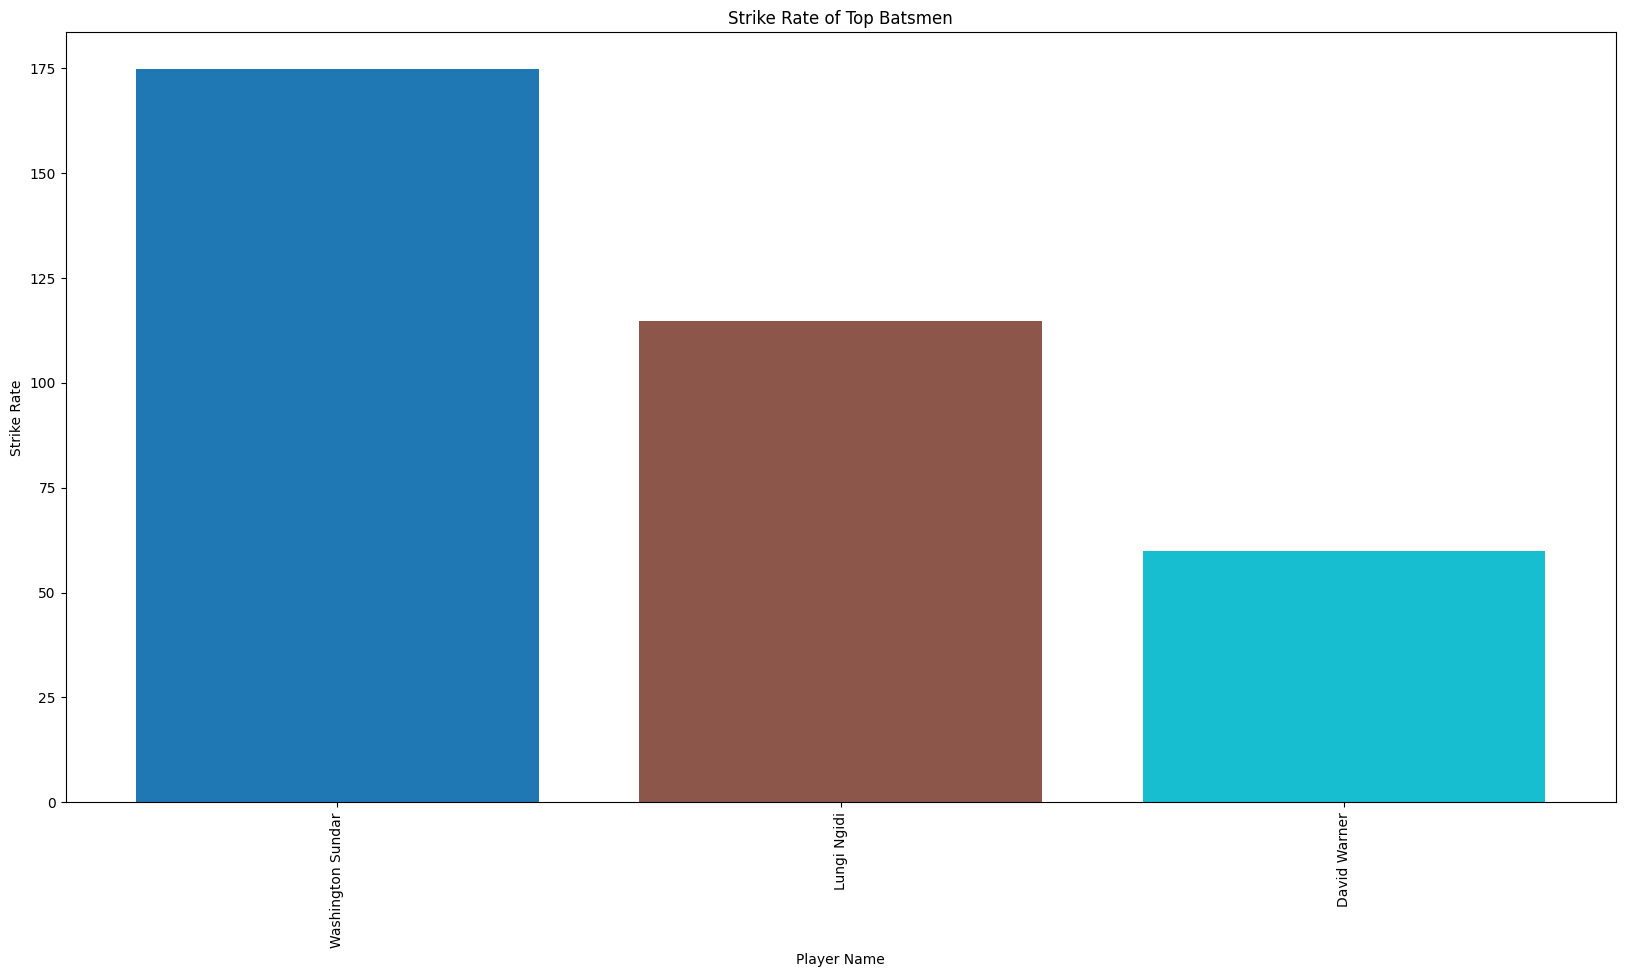

In [127]:
#THIS IS THE SAME PLOT AS ABOVE ONE BUT JUST WE DIFFERNTIATED THE DATA USING DIFFERENT COLORS

plt.figure(figsize=(20, 10))

# Generate unique colors for each bar
colors = plt.cm.get_cmap("tab10", len(top_batsmen)) # Try 'viridis', 'Set2', etc.

plt.bar(top_batsmen["Player Name"], top_batsmen["Strike Rate"], color=[colors(i) for i in range(len(top_batsmen))])

plt.xlabel("Player Name")
plt.ylabel("Strike Rate")
plt.title("Strike Rate of Top Batsmen")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of Btasmen Data
#the plot shows each of the top batsman runs
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Runs", data=top_batsmen,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of Btasmen Data
#the plot shows each of the top batsman average
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Average", data=top_batsmen,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of Btasmen Data
#the plot shows each of the top batsman matches played
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Matches Played", data=top_batsmen,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

To gain deeper insights into the bowlers' performance, we will use bar graphs to visualize important metrics like wickets taken, bowling average, economy rate, and bowling strike rate. These visual representations will allow us to quickly compare the bowlers' effectiveness in different aspects of their game, helping to highlight the most impactful players across multiple key performance indicators.

In [ ]:
#visualistaion of Bowlers Data
#the plot shows each of the top bowling average
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Bowling Average", data=top_bowlers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of Bowlers Data
#the plot shows each of the top bowling economy
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Economy", data=top_bowlers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of Bowlers Data
#the plot shows each of the top bowling strike rate
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Bowling Strike Rate", data=top_bowlers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of Bowlers Data
#the plot shows each of the top bowling wickets
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Wickets", data=top_bowlers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

To analyze the performance of all-rounders in a more comprehensive way, we'll use bar graphs to visualize their dual role in both batting and bowling. These charts will highlight their runs, batting average, strike rate, wickets, bowling average, economy rate, and bowling strike rate. This approach will allow us to assess all-rounders’ contributions across both disciplines, giving us a clearer picture of their overall impact on the game.

In [ ]:
#visualistaion of All Rounders Data
#the plot shows each of the top All rounders strike rate
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Strike Rate", data=top_allrounders,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of All Rounders Data
#the plot shows each of the top All rounders average
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Average", data=top_allrounders,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of All Rounders Data
#the plot shows each of the top All rounders matches played
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Matches Played", data=top_allrounders,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of All Rounders Data
#the plot shows each of the top All rounders runs
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Runs", data=top_allrounders,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of All Rounders Data
#the plot shows each of the top All rounders bowling average
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Bowling Average", data=top_allrounders,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of All Rounders Data
#the plot shows each of the top All rounders bowling economy
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Economy", data=top_allrounders,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of All Rounders Data
#the plot shows each of the top All rounders bowling strike rate
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Bowling Strike Rate", data=top_allrounders,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of All Rounders Data
#the plot shows each of the top All rounders wickets
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Wickets", data=top_allrounders,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In order to better understand the performance of wicket-keepers, we will turn to visual representations such as bar graphs. These graphs will showcase key statistics like runs scored, batting average, strike rate, as well as their contributions in the field, including catches, run outs, and stumps. By visualizing this data, we can more easily compare the all-around contributions of each wicket-keeper to make more informed decisions

In [ ]:
#visualistaion of Wicket Keepers Data
#the plot shows each of the top Wicket Keepers average
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Average", data=top_keepers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of Wicket keepers Data
#the plot shows each of the top Wicket Keepers Strike Rate
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Strike Rate", data=top_keepers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of Wicket keepers Data
#the plot shows each of the top Wicket Keeper Catches
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Catches", data=top_keepers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

In [ ]:
#visualistaion of Wicket keepers Data
#the plot shows each of the top Wicket Keepers Run Outs
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Run Outs", data=top_keepers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

<ipython-input-128-a24a2c9bddc2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Player Name", y="Stumps", data=top_keepers,palette="husl")


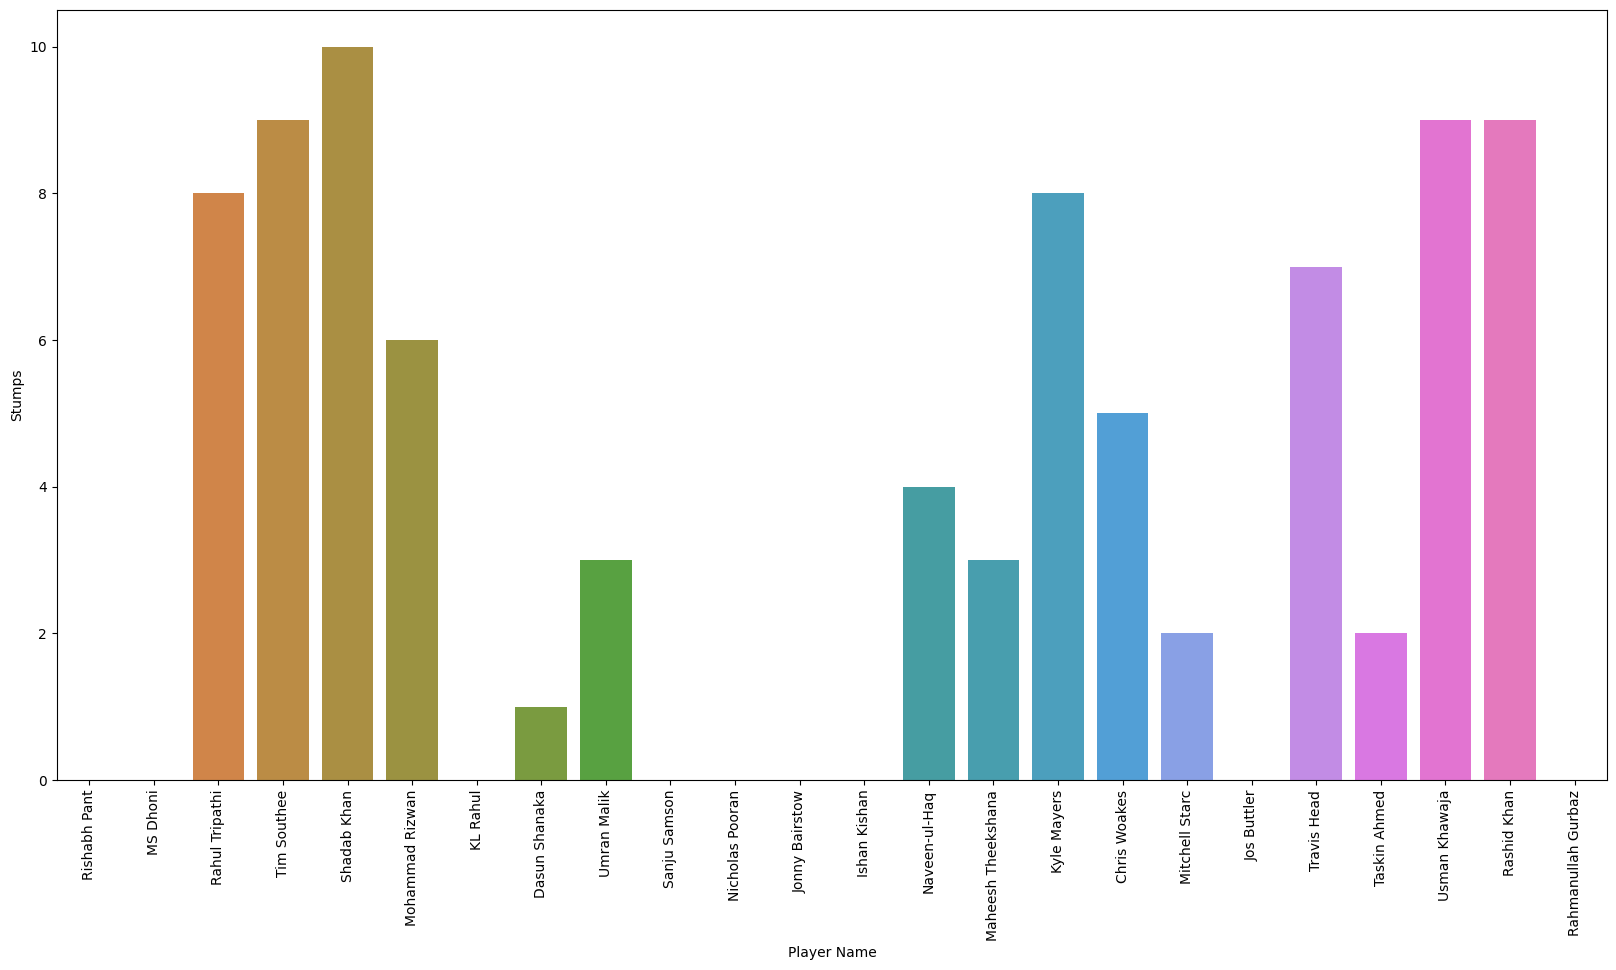

In [128]:
#visualistaion of Wicket keepers Data
#the plot shows each of the top Wicket keepers stumps
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Stumps", data=top_keepers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

<ipython-input-125-6f91abd7bdc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Player Name", y="Matches Played", data=top_keepers,palette="husl")


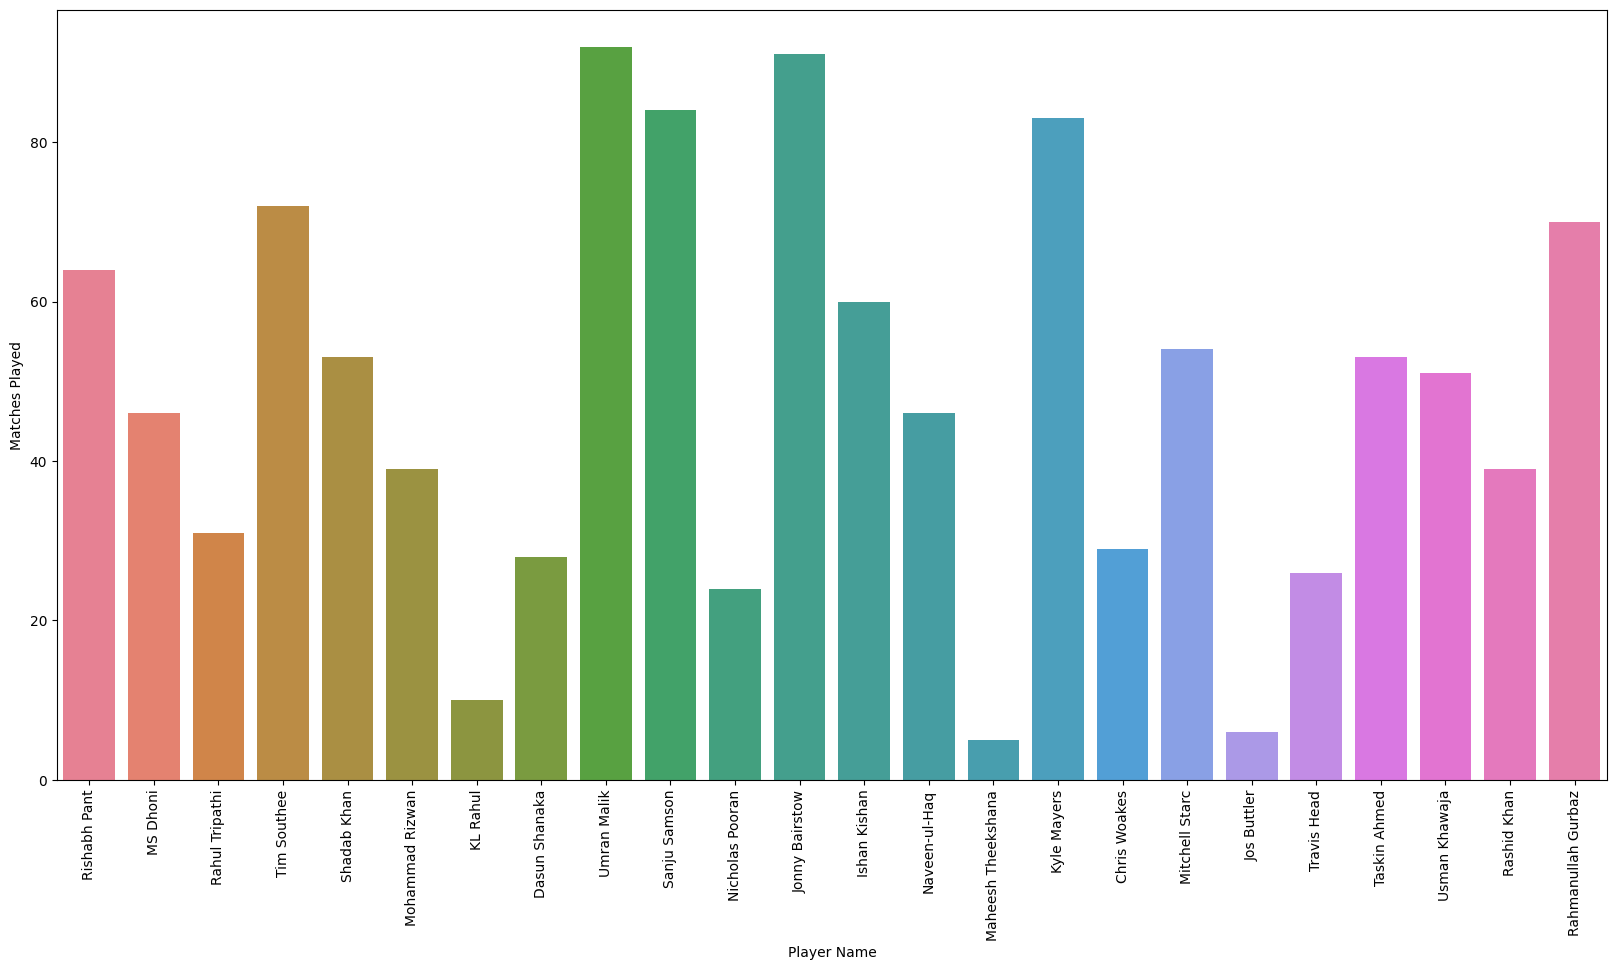

In [125]:
#visualistaion of Wicket keepers Data
#the plot shows each of the top Wicket keepers matches played
plt.figure(figsize=(20,10))
sns.barplot(x="Player Name", y="Matches Played", data=top_keepers,palette="husl")
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

# **Formation Of Team**

**Batsmen:-**
Now, we are going to identify the top 3 performers from the batsmen dataset for our analysis. These top batsmen will be selected based on their batting statistics, such as runs, batting average, and strike rate, to form a crucial part of our team. By narrowing down the data, we will be able to identify the key players who have excelled in these areas and are best suited for inclusion in our ideal playing XI. This selection will help ensure that we have the most effective and consistent batsmen in the team based on their recent performances in IPL 2024.

In [ ]:
# Load the dataset
file_path = "https://raw.githubusercontent.com/13mayankjoshi13/Data_Analysis_of_IPL_2024/refs/heads/main/IPL_2024_Players_Dataset.csv"
df = pd.read_csv(file_path)

# Filter only batsmen
top_batsmen = df[df["Player Type"] == "Batsman"].copy()

# Convert necessary columns to numeric
numeric_columns = ["Runs", "Average", "Strike Rate", "Matches Played"]
top_batsmen[numeric_columns] = top_batsmen[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Sort batsmen based on Runs, Average, and Strike Rate
top_batsmen = top_batsmen.sort_values(
    by=["Runs", "Average", "Strike Rate"],
    ascending=[False, False, False]  # Higher values are better
).reset_index(drop=True)

# Select top 3 batsmen
dynamic_top_batsmen = top_batsmen.head(3)
labels = dynamic_top_batsmen["Player Name"].tolist()

# Extract values
matches_values = dynamic_top_batsmen["Matches Played"].tolist()
runs_values = dynamic_top_batsmen["Runs"].tolist()
average_values = dynamic_top_batsmen["Average"].tolist()
strike_rate_values = dynamic_top_batsmen["Strike Rate"].tolist()

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Runs in IPL 2024")
axes[1][0].set_title("Batting Strike Rate")
axes[1][1].set_title("Batting Average")

sns.barplot(x=labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=labels, y=strike_rate_values, ax=axes[1][0])
sns.barplot(x=labels, y=average_values, ax=axes[1][1])

plt.tight_layout()
plt.show()


After analyzing the visualizations, the top 3 batsmen are:-    

 **Washington Sundar**    
 **Lungi Ngidi**  
 **David Warner**

**All Rounders:-** We will focus on identifying the top 3 all-rounders from the dataset based on their performance across both batting and bowling metrics. We will consider key factors like runs scored, batting average, strike rate, wickets taken, bowling average, economy rate, and bowling strike rate. By filtering the data, we can select the top all-rounders who have shown outstanding skills in both disciplines, ensuring a balanced and versatile addition to our ideal playing XI.

In [ ]:
print(len(top_allrounders))

In [ ]:
# Load the dataset
file_path = "https://raw.githubusercontent.com/13mayankjoshi13/Data_Analysis_of_IPL_2024/refs/heads/main/IPL_2024_Players_Dataset.csv"
df = pd.read_csv(file_path)

# Filter only all-rounders
top_allrounders = df[df["Player Type"] == "All-Rounder"].copy()

# Convert necessary columns to numeric to avoid errors
numeric_columns = ["Runs", "Average", "Strike Rate", "Wickets", "Bowling Average", "Matches Played"]
top_allrounders[numeric_columns] = top_allrounders[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Sort all-rounders based on Batting & Bowling performance
top_allrounders = top_allrounders.sort_values(
    by=["Runs", "Average", "Strike Rate", "Wickets", "Bowling Average"],
    ascending=[False, False, False, False, True]  # Higher is better, except Bowling Avg (lower is better)
).reset_index(drop=True)

# Select top 3 all-rounders
dynamic_top_allrounders = top_allrounders.head(3)
labels = dynamic_top_allrounders["Player Name"].tolist()

# Extract values
matches_values = dynamic_top_allrounders["Matches Played"].tolist()
runs_values = dynamic_top_allrounders["Runs"].tolist()
average_values = dynamic_top_allrounders["Average"].tolist()
strike_rate_values = dynamic_top_allrounders["Strike Rate"].tolist()
bowling_strike_rate_values = dynamic_top_allrounders["Bowling Strike Rate"].tolist()
bowling_average_values = dynamic_top_allrounders["Bowling Average"].tolist()
wickets_values = dynamic_top_allrounders["Wickets"].tolist()
economy_values = dynamic_top_allrounders["Economy"].tolist()

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Batting Average")
axes[1][1].set_title("Strike Rate")
axes[2][0].set_title("Bowling Average")
axes[2][1].set_title("Wickets")

sns.barplot(x=labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=labels, y=average_values, ax=axes[1][0])
sns.barplot(x=labels, y=strike_rate_values, ax=axes[1][1])
sns.barplot(x=labels, y=bowling_average_values, ax=axes[2][0])
sns.barplot(x=labels, y=wickets_values, ax=axes[2][1])

plt.tight_layout()
plt.show()


Based on our analysis, the top 3 all-rounders are:-  
**Dawid Malan**    
**Pathum Nissanka**  
**Daryl Mitchell**    

**Bowlers:-** We will identify the top 4 bowlers from the dataset based on their performance. These bowlers will be selected considering key metrics such as wickets taken, bowling average, strike rate, and economy rate. By narrowing down the data, we aim to pick the most consistent and impactful bowlers, who have excelled in these crucial areas, to form the backbone of our team. This will ensure we have the best bowlers, who have demonstrated exceptional skill in IPL 2024, to represent our ideal playing XI.

In [ ]:
print(len(top_bowlers))

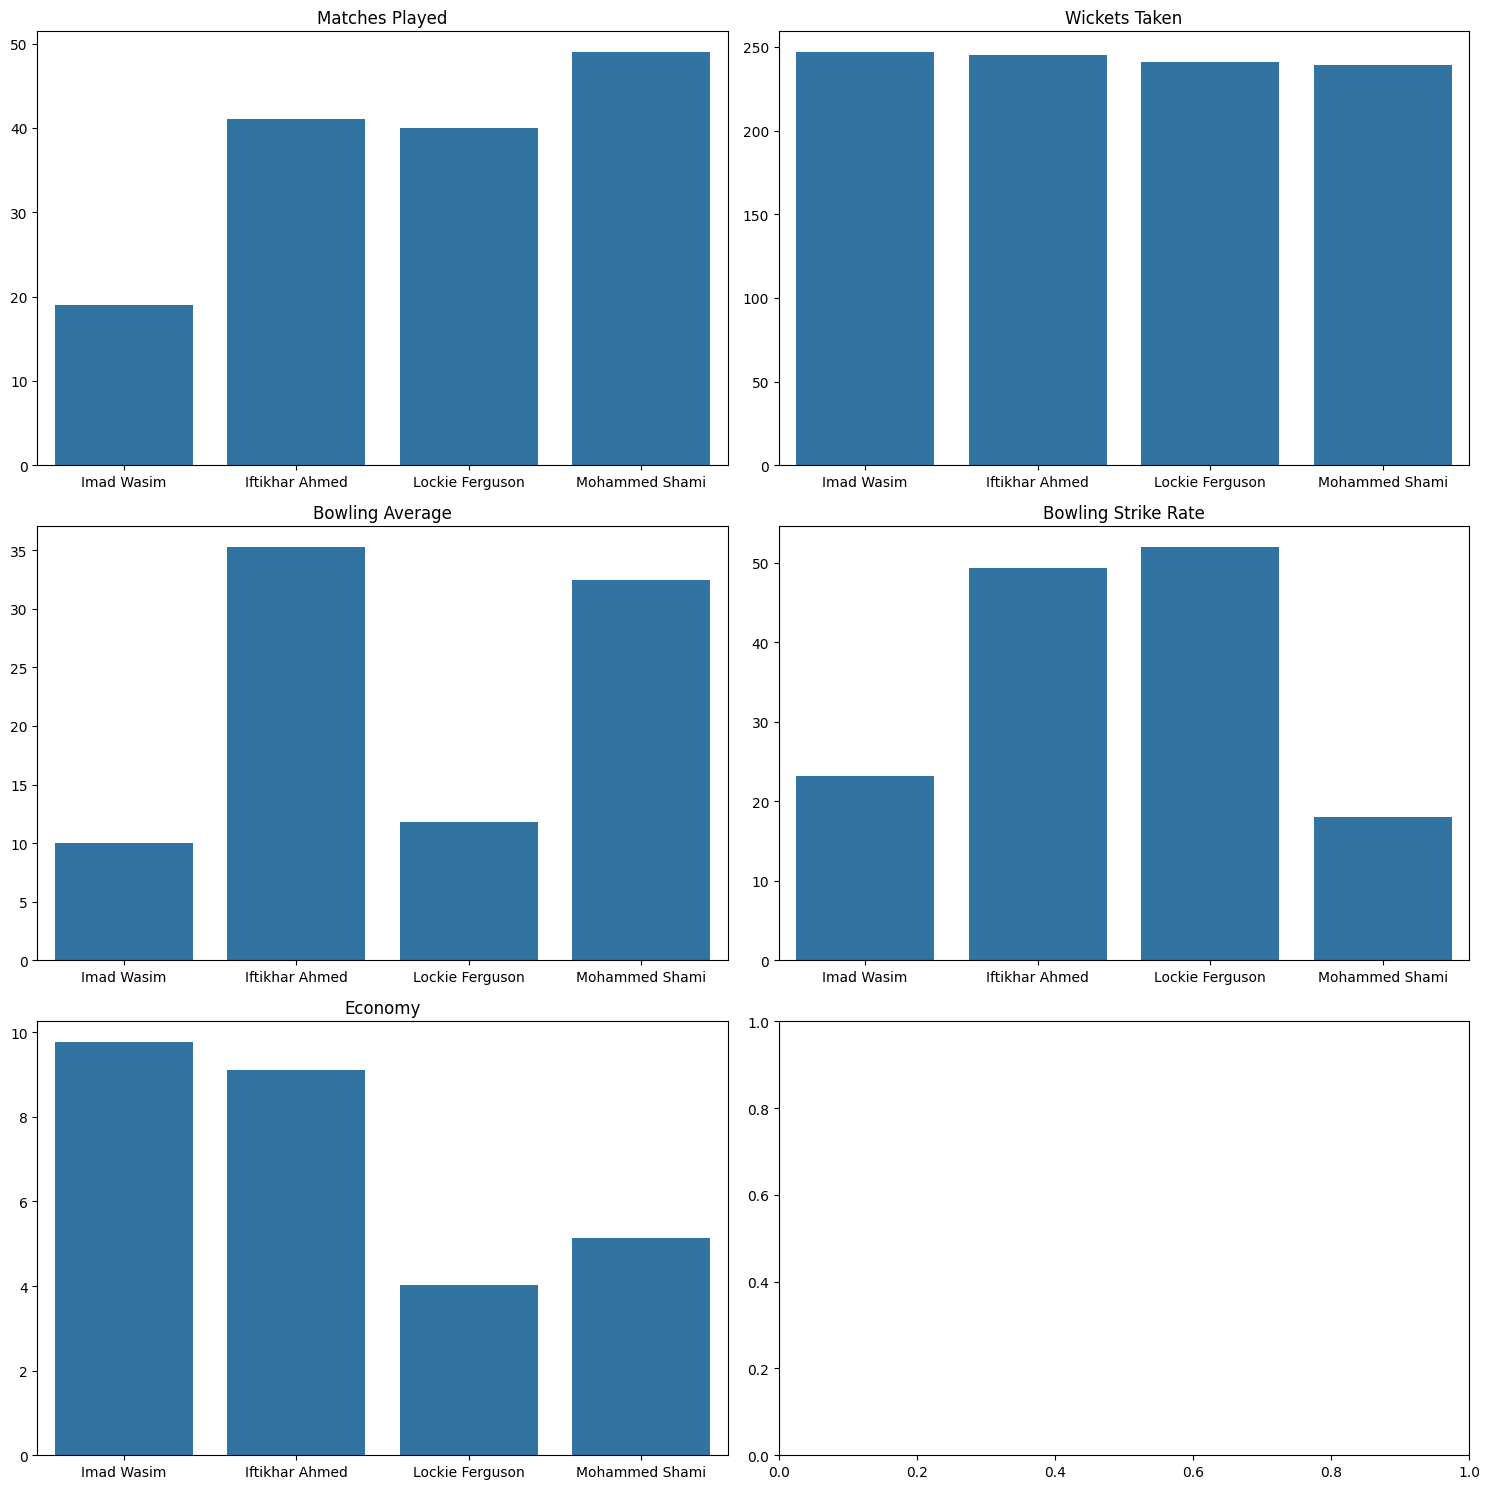

In [129]:
# Load the dataset from GitHub
file_url = "https://raw.githubusercontent.com/13mayankjoshi13/Data_Analysis_of_IPL_2024/refs/heads/main/IPL_2024_Players_Dataset.csv"
df = pd.read_csv(file_url)

# Filter only bowlers
top_bowlers = df[df["Player Type"] == "Bowler"].copy()

# Convert necessary columns to numeric
numeric_columns = ["Wickets", "Bowling Average", "Bowling Strike Rate", "Economy", "Matches Played"]
top_bowlers[numeric_columns] = top_bowlers[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Sort bowlers based on best performance
top_bowlers = top_bowlers.sort_values(
    by=["Wickets", "Bowling Average", "Bowling Strike Rate", "Economy"],
    ascending=[False, True, True, True]  # More wickets, lower avg, strike rate, economy
).reset_index(drop=True)

# Select top 3 bowlers
dynamic_top_bowlers = top_bowlers.head(4)
labels = dynamic_top_bowlers["Player Name"].tolist()

# Extract values
matches_values = dynamic_top_bowlers["Matches Played"].tolist()
wickets_values = dynamic_top_bowlers["Wickets"].tolist()
bowling_average_values = dynamic_top_bowlers["Bowling Average"].tolist()
bowling_strike_rate_values = dynamic_top_bowlers["Bowling Strike Rate"].tolist()
economy_values = dynamic_top_bowlers["Economy"].tolist()

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Wickets Taken")
axes[1][0].set_title("Bowling Average")
axes[1][1].set_title("Bowling Strike Rate")
axes[2][0].set_title("Economy")

sns.barplot(x=labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=labels, y=wickets_values, ax=axes[0][1])
sns.barplot(x=labels, y=bowling_average_values, ax=axes[1][0])
sns.barplot(x=labels, y=bowling_strike_rate_values, ax=axes[1][1])
sns.barplot(x=labels, y=economy_values, ax=axes[2][0])

plt.tight_layout()
plt.show()

After analyzing the data, the top 4 bowlers are:-    
**Imad Wasim**    
**Iftikhar Ahmed**     
**Lockie Ferguson**   
**Mohammed Shami**

**Wicket Keeper:-** We will pinpoint the top 1 wicketkeeper from the dataset, considering their performance in batting as well as wicketkeeping stats like runs, average, strike rate, catches, and stumpings. This player will be chosen for their all-around contributions behind the stumps and in the batting order, ensuring we have a reliable and skilled wicketkeeper for our team

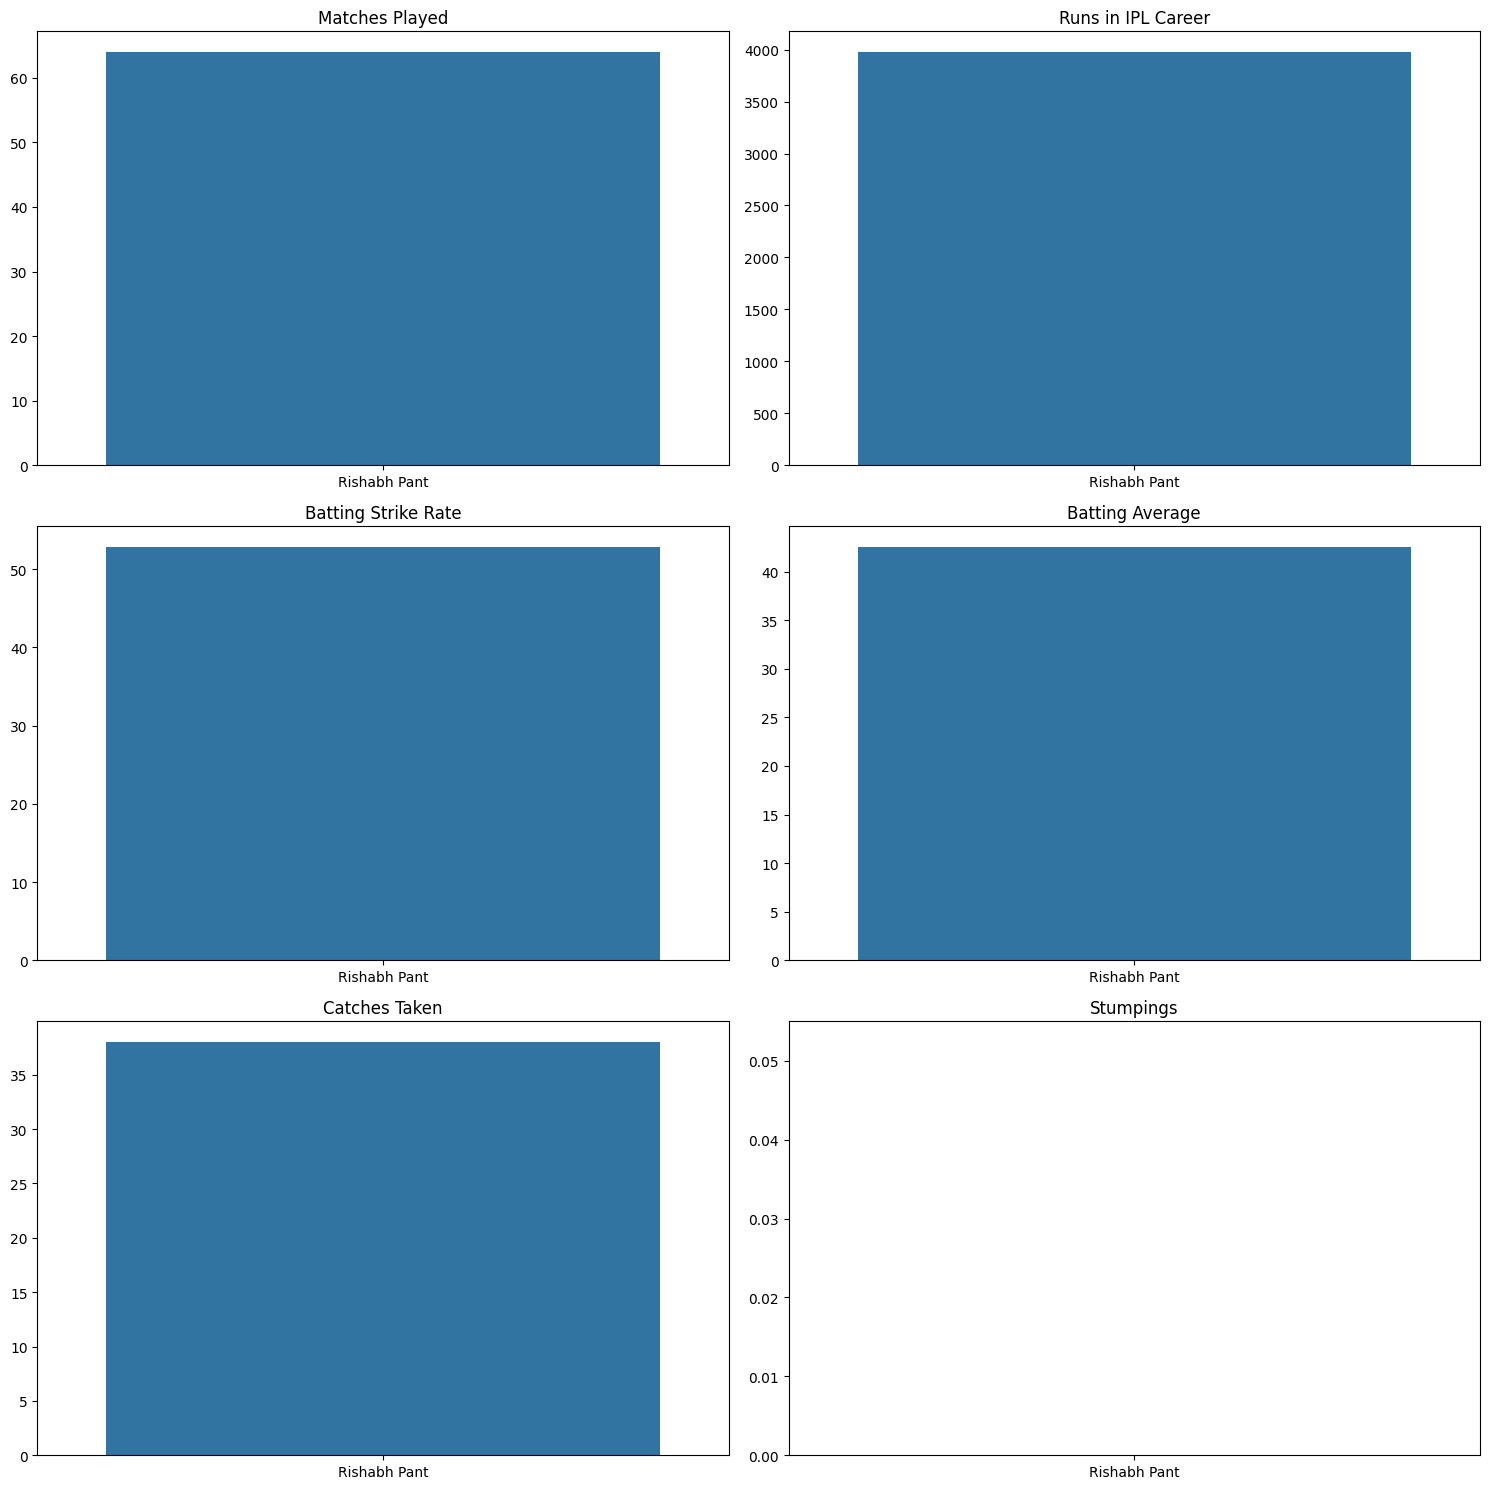

In [131]:
# Load the dataset
file_url = "https://raw.githubusercontent.com/13mayankjoshi13/Data_Analysis_of_IPL_2024/main/IPL_2024_Players_Dataset.csv"
df = pd.read_csv(file_url)

# Filter only wicketkeepers (corrected category name)
top_keepers = df[df["Player Type"] == "Wicket-Keeper"].copy()

# Convert necessary columns to numeric
numeric_columns = ["Runs", "Average", "Strike Rate", "Matches Played", "Catches", "Stumps"]
top_keepers[numeric_columns] = top_keepers[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop any missing values
top_keepers = top_keepers.dropna()

# Sort by performance metrics
top_keepers = top_keepers.sort_values(
    by=["Runs", "Average", "Strike Rate", "Catches", "Stumps"],
    ascending=[False, False, False, False, False]
).reset_index(drop=True)

# Select top 3 wicketkeepers
dynamic_top_keepers = top_keepers.head(1)

# Extract values for plotting
labels = dynamic_top_keepers["Player Name"].tolist()
matches_values = dynamic_top_keepers["Matches Played"].tolist()
runs_values = dynamic_top_keepers["Runs"].tolist()
average_values = dynamic_top_keepers["Average"].tolist()
strike_rate_values = dynamic_top_keepers["Strike Rate"].tolist()
catches_values = dynamic_top_keepers["Catches"].tolist()
stumpings_values = dynamic_top_keepers["Stumps"].fillna(0).tolist()  # Ensure no NaN values

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
titles = ["Matches Played", "Runs in IPL Career", "Batting Strike Rate", "Batting Average", "Catches Taken", "Stumpings"]
data_values = [matches_values, runs_values, strike_rate_values, average_values, catches_values, stumpings_values]

# Generate bar plots
for ax, title, values in zip(axes.flat, titles, data_values):
    sns.barplot(x=labels, y=values, ax=ax, dodge=False)
    ax.set_title(title)
    ax.set_ylim(bottom=0)  # Ensure y-axis starts from 0

plt.tight_layout()
plt.show()


After analyzing the data, the top wicketkeeper is **Rishabh Pant** , based on his outstanding performance.

# **Best Playing XI Based on IPL 2024 Performance Analysis**

After thoroughly analyzing the data, we are now ready to present the best playing XI based on the performance metrics of the players. By selecting the top 3 batsmen, 3 all-rounders, 4 bowlers, and 1 wicketkeeper, we have ensured that our team is made up of the most consistent and high-performing players from IPL 2024. This final selection is driven by factors such as batting average, strike rate, runs scored, wickets taken, bowling economy, and other key performance indicators. With a well-rounded combination of skill and consistency, our ideal playing XI is now set to take on the field, backed by data-driven insights.

**Finalized Playing XI**

 Washington Sundar   
 Lungi Ngidi    
 David Warner     
 Dawid Malan    
 Pathum Nissanka    
 Daryl Mitchell    
 Rishabh Pant  
 Imad Wasim        
 Iftikhar Ahmed        
 Lockie Ferguson       
 Mohammed Shami

In [130]:
# Load the dataset
file_url = "https://raw.githubusercontent.com/13mayankjoshi13/Data_Analysis_of_IPL_2024/refs/heads/main/IPL_2024_Players_Dataset.csv"
df = pd.read_csv(file_url)

# Convert necessary columns to numeric
numeric_columns = ["Runs", "Average", "Strike Rate", "Wickets", "Bowling Average",
                   "Bowling Strike Rate", "Economy", "Matches Played", "Catches", "Stumps"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Select top 3 batsmen based on Runs, Average, Strike Rate
top_batsmen = df[df["Player Type"] == "Batsman"].sort_values(
    by=["Runs", "Average", "Strike Rate"], ascending=[False, False, False]
).head(3)

# Select top 4 bowlers based on Wickets, Bowling Average, Strike Rate, Economy
top_bowlers = df[df["Player Type"] == "Bowler"].sort_values(
    by=["Wickets", "Bowling Average", "Bowling Strike Rate", "Economy"],
    ascending=[False, True, True, True]
).head(4)

# Select top 3 all-rounders based on Batting & Bowling performance
top_allrounders = df[df["Player Type"] == "All-Rounder"].sort_values(
    by=["Wickets", "Runs", "Bowling Average", "Average"], ascending=[False, False, True, False]
).head(3)

# Select 1 wicketkeeper based on Batting performance & Keeping Stats
top_wicketkeeper = df[df["Player Type"] == "Wicket-Keeper"].sort_values(
    by=["Runs", "Catches", "Stumps"], ascending=[False, False, False]
).head(1)

# Combine all selected players
best_team = pd.concat([top_batsmen, top_bowlers, top_allrounders, top_wicketkeeper])

# Display the best team
print("Best IPL 2024 Team of 11 Players:")
print(best_team[["Player Name", "Player Type", "Runs", "Wickets", "Average", "Bowling Average"]])

Best IPL 2024 Team of 11 Players:
           Player Name    Player Type  Runs  Wickets  Average  Bowling Average
35   Washington Sundar        Batsman  3935        0    45.21             0.00
45         Lungi Ngidi        Batsman  3506        0    29.69             0.00
83        David Warner        Batsman  3450      198    37.02            10.33
76          Imad Wasim         Bowler     0      247     0.00            10.03
93      Iftikhar Ahmed         Bowler     0      245     0.00            35.27
0      Lockie Ferguson         Bowler     0      241     0.00            11.78
123     Mohammed Shami         Bowler     0      239     0.00            32.48
58         Dawid Malan    All-Rounder  2138      243    49.63            33.74
120    Pathum Nissanka    All-Rounder  2555      240    55.27            17.59
73      Daryl Mitchell    All-Rounder  3261      234    53.46            30.18
52        Rishabh Pant  Wicket-Keeper  3977      220    42.54            38.45


# **Building an AI-Driven Best IPL Team Using Machine Learning and Deep Learning for Performance Prediction**

In this project, we are using Machine Learning and Deep Learning to analyze IPL player data and select the best possible team:

**Machine Learning for Data Analysis:**

We start by analyzing the performance data of players (runs, wickets, strike rates, averages, etc.).
A performance score is calculated by combining these metrics with specific weights, helping us assess each player's overall performance.
This score helps rank players according to their performance.

**Deep Learning for Prediction:**

Deep learning is used to improve the accuracy of predictions. It involves training a neural network to learn from complex patterns in the data.
The neural network is designed to adjust and refine its predictions over time, making it capable of predicting future performance based on historical data.

**Neural Network Process:**

The neural network model learns from the data, identifying relationships between different performance metrics (e.g., runs, wickets, bowling average).
The model improves its predictions during the training phase, which leads to better results for player selection.

**AI-Powered Team Selection:**

Once trained, the model predicts the performance scores for all players.
Using these predictions, we select the top 3 batsmen, 4 bowlers, 3 all-rounders, and 1 wicketkeeper based on expected future performance.

**Machine Learning vs Deep Learning:**

Machine Learning helps us analyze the data and calculate performance scores.
Deep Learning (via the neural network) makes more accurate predictions by recognizing complex patterns and relationships within the data.

**Outcome:**

By combining machine learning and deep learning, we can form a data-driven best IPL team, with player selections backed by accurate, intelligent predictions of their performance.

In [ ]:
# Install TensorFlow
!pip install tensorflow

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_url = "https://raw.githubusercontent.com/13mayankjoshi13/Data_Analysis_of_IPL_2024/refs/heads/main/IPL_2024_Players_Dataset.csv"
df = pd.read_csv(file_url)

# Convert necessary columns to numeric
numeric_columns = ["Runs", "Average", "Strike Rate", "Wickets", "Bowling Average",
                   "Bowling Strike Rate", "Economy", "Matches Played", "Catches", "Stumps"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Define features and target variable (Predicting Performance Score)
df["Performance_Score"] = (df["Runs"] * 0.4 + df["Average"] * 0.3 + df["Strike Rate"] * 0.3 +
                            df["Wickets"] * 0.4 - df["Bowling Average"] * 0.3 - df["Economy"] * 0.3)

X = df[numeric_columns]
y = df["Performance_Score"]

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Neural Network Model
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Predicting a continuous performance score
])

# Compile Model
model_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train Model
model_nn.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# Predict Performance Scores with Neural Network
df["Predicted_Performance_NN"] = model_nn.predict(X_scaled)

# Sort Players Based on AI Predictions
df_sorted_nn = df.sort_values(by="Predicted_Performance_NN", ascending=False)

# Select players based on roles
best_batsmen_nn = df_sorted_nn[df_sorted_nn["Player Type"] == "Batsman"].head(3)
best_bowlers_nn = df_sorted_nn[df_sorted_nn["Player Type"] == "Bowler"].head(4)
best_allrounders_nn = df_sorted_nn[df_sorted_nn["Player Type"] == "All-Rounder"].head(3)
best_wicketkeeper_nn = df_sorted_nn[df_sorted_nn["Player Type"] == "Wicket-Keeper"].head(1)

# Combine into final AI-selected team
best_team_nn = pd.concat([best_batsmen_nn, best_bowlers_nn, best_allrounders_nn, best_wicketkeeper_nn])

# Display the Best Team
print("🔥 AI-Powered Best IPL 2024 Team 🔥")
print(best_team_nn[["Player Name", "Player Type", "Predicted_Performance_NN"]])

# **Conclusion:**

In this project, we successfully applied data science and AI/ML techniques to analyze the IPL 2024 dataset and predict the best possible cricket team. We analyzed the IPL 2024 dataset using data analytics techniques to evaluate player performance across various metrics. By comparing the data, we identified the top players in each category, including the best batsmen, all-rounders, bowlers, and wicketkeeper who would form the ideal team.

We made use of **Matplotlib** and **Seaborn** to create clear and engaging bar graph visualizations, bringing the data to life. These visualizations allowed us to spot trends, compare players, and make informed decisions about team selection.

Leveraging **machine learning** and **deep learning**, we predicted the optimal team composition, showcasing the power of AI in sports analytics. This approach demonstrated how data-driven insights can transform decision-making in sports, making team selection more strategic and efficient.

Ultimately, this project not only highlights the potential of AI/ML and Data Analytics in cricket but also emphasizes the growing importance of technology in solving real-world problems. Through this work, we’ve made a significant contribution to the field of sports analytics, providing a model that can assist in team-building and performance analysis.

